# Loss functions

## Linear classifiers: the coefficients



In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [2]:
import matplotlib.pyplot as plt

In [3]:
x= np.arange(3)
x

array([0, 1, 2])

In [4]:
y=np.arange(3,6)
y

array([3, 4, 5])

In [5]:
x*y

array([ 0,  4, 10])

In [6]:
np.sum(x*y)

14

In [7]:
x@y

14

* x@y is called the dot product of x and y , and is wrien x ⋅ y

**How logisticReg makes predictions**

How models make predictions
Which classifiers make predictions based on the sign (positive or negative) of the raw model output?


Both logistic regression and Linear SVMs

Furthermore, since logistic regression and SVMs are both linear classifiers, the raw model output is a linear function of x.

As you've been experiencing, the coefficients determine the slope of the boundary and the intercept shifts it.

In [12]:
import warnings
from sklearn.datasets import load_boston
with warnings.catch_warnings():
    # You should probably not use this dataset.
    warnings.filterwarnings("ignore")
    X, y = load_boston(return_X_y=True)

print('No of instances and features',X.shape)
print("shape of label is ",y.shape)

No of instances and features (506, 13)
shape of label is  (506,)


## Minimizing a loss function

In this exercise you'll implement linear regression "from scratch" using scipy.optimize.minimize.

We'll train a model on the Boston housing price data set, which is already loaded into the variables X and y. For simplicity, we won't include an intercept in our regression model.

**Instructions**

* Fill in the loss function for least squares linear regression.
* Print out the coefficients from fitting sklearn's LinearRegression.

In [14]:
from scipy.optimize import minimize
from sklearn.linear_model import LinearRegression

Minimize SSE:

$$\sum_{i=1}^n (y_i-w_i*X_i)$$

In [16]:
X.shape

(506, 13)

In [15]:
# The squared error, summed over training examples
def my_loss(w):
    s = 0
    for i in range(y.size):
        # Get the true and predicted target values for example 'i'
        y_i_true = y[i]
        y_i_pred = w@X[i]
        s = s + (y_i_true-y_i_pred)**2
    return s

# Returns the w that makes my_loss(w) smallest
w_fit = minimize(my_loss, X[0]).x
print(w_fit)

# Compare with scikit-learn's LinearRegression coefficients
lr = LinearRegression(fit_intercept=False).fit(X,y)
print(lr.coef_)

[-9.28965558e-02  4.87152754e-02 -4.05795839e-03  2.85399966e+00
 -2.86835113e+00  5.92815351e+00 -7.26931907e-03 -9.68513224e-01
  1.71156038e-01 -9.39662194e-03 -3.92188100e-01  1.49054696e-02
 -4.16304249e-01]
[-9.28965170e-02  4.87149552e-02 -4.05997958e-03  2.85399882e+00
 -2.86843637e+00  5.92814778e+00 -7.26933458e-03 -9.68514157e-01
  1.71151128e-01 -9.39621540e-03 -3.92190926e-01  1.49056102e-02
 -4.16304471e-01]


In [18]:
print(f'number of coefficents {len(w_fit)}')
print(f'number of features {X.shape[1]}')

number of coefficents 13
number of features 13


**Loss function diagrams**

Which of the four loss functions makes sense for classification?

![Classification loss functions](multiple_choice_loss_diagram.png)

line 2, This loss is very similar to the hinge loss used in SVMs (just shifted slightly)

## Comparing the logistic and hinge losses

In this exercise you'll create a plot of the logistic and hinge losses using their mathematical expressions, which are provided to you.

The loss function diagram from the video is shown on the right.

**Instructions**

* Evaluate the log_loss() and hinge_loss() functions at the grid points so that they are plotted.

In [19]:
# Mathematical functions for logistic and hinge losses
def log_loss(raw_model_output):
   return np.log(1+np.exp(-raw_model_output))
def hinge_loss(raw_model_output):
   return np.maximum(0,1-raw_model_output)

# Create a grid of values and plot
grid = np.linspace(-2,2,1000)


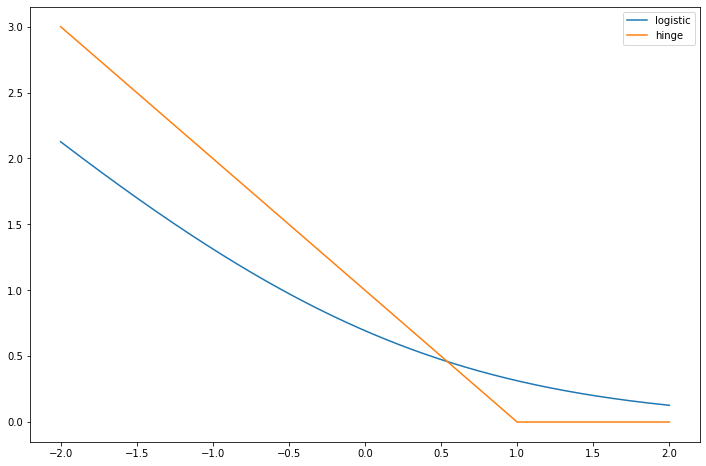

In [20]:

plt.figure(figsize=(12,8))
plt.plot(grid, log_loss(grid), label='logistic')
plt.plot(grid, hinge_loss(grid), label='hinge')
plt.legend()
plt.show()

## Implementing logistic regression

This is very similar to the earlier exercise where you implemented linear regression "from scratch" using scipy.optimize.minimize. However, this time we'll minimize the logistic loss and compare with scikit-learn's LogisticRegression (we've set C to a large value to disable regularization; more on this in Chapter 3!).

The log_loss() function from the previous exercise is already defined in your environment, and the sklearn breast cancer prediction dataset (first 10 features, standardized) is loaded into the variables X and y.

**Instructions**

* Input the number of training examples into range().
* Fill in the loss function for logistic regression.
* Compare the coefficients to sklearn's LogisticRegression

In [26]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X=data.data
y=data.target
print(f'X shape is {X.shape} \ny shape is {y.shape}')

X shape is (569, 30) 
y shape is (569,)


$$log\_loss=log(1+e^{-w_iX_i*y_i})$$

$$loss\_function=\sum_{i=1}^n log(1+e^{-w_iX_i*y_i})$$

In [27]:
# The logistic loss, summed over training examples
def my_loss(w):
    s = 0
    for i in range(y.size):
        raw_model_output = w@X[i]
        s = s + log_loss(raw_model_output * y[i])
    return s

# Returns the w that makes my_loss(w) smallest
w_fit = minimize(my_loss, X[0]).x
print(w_fit)

# Compare with scikit-learn's LogisticRegression
lr = LogisticRegression(fit_intercept=False, C=1000000).fit(X,y)
print(lr.coef_)

[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]
[[ 1.07939487  0.50845622  0.26056367 -0.01650821 -0.04082666 -0.1910194
  -0.26727976 -0.11269889 -0.0565278  -0.01132609  0.04728745  0.43161617
   0.17756059 -0.13258525 -0.00367046 -0.04087278 -0.05699795 -0.01463612
  -0.01365077 -0.00380474  1.14769484 -0.57626749 -0.24703615 -0.0146505
  -0.07387695 -0.59444528 -0.7398741  -0.21656407 -0.17871552 -0.05731223]]


C:\Users\aduzo\Anaconda3\envs\gmsjupyter\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


As you can see, logistic regression is just minimizing the loss function we've been looking at. 